In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data= pd.read_csv("C:\\Users\\62408\\Desktop\\Kaggle\\House Pred\\trainandtest.csv")
pd.pandas.set_option('display.max_columns',None)
data.shape

(2919, 81)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,0.865917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,0.005111
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,-0.029003
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,-0.042055
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,-0.002203
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.010184
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.004889
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,-0.025519
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,-0.005150
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.0997

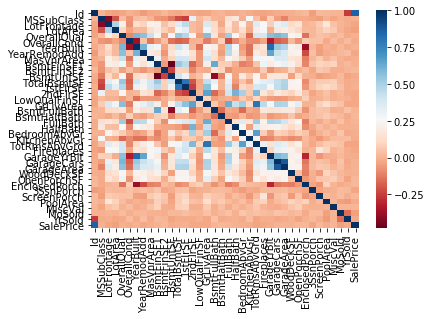

In [2]:
# calculate the correlation matrix
corr = data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [3]:
## Let us capture all the nan values for train
## First lets handle Categorical features which are missing
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Alley: 0.9322% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values
PoolQC: 0.9966% missing values
Fence: 0.8044% missing values
MiscFeature: 0.964% missing values


In [4]:
data['Alley']=data['FireplaceQu'].fillna('MissingAlley')
data['FireplaceQu']=data['FireplaceQu'].fillna('MissingFireplace')
data['Fence']=data['Fence'].fillna('MissingFENCE')
data['PoolQC']=data['PoolQC'].fillna('MissingPOOL')
data['MiscFeature']=data['MiscFeature'].fillna('MissingMISC')

In [5]:
## Replace missing value with a new label for train
def replace_cat_feature(data,features_nan):
    dataset=data.copy()
    dataset[features_nan]=dataset[features_nan].fillna('Missing')
    return dataset

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [6]:
## Now lets check for numerical variables the contains missing values for train
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value


In [7]:
## Replacing the numerical Missing Values for train

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    #data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()


LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [8]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    data[feature]=data['YrSold']-data[feature]
    

In [9]:
### log transorm for train
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    data[feature]=np.log(data[feature])

In [10]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']


In [11]:
#train
for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

In [12]:
#one hot enceoding
for feature in categorical_features:
    dummy = pd.get_dummies(data[feature])
    data=pd.concat([data,dummy],axis=1)
    data=data.drop(feature,axis=1)

In [13]:
## feature scaling for train
feature_scale=[feature for feature in data if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
def remove_dup_columns(data):
     keep_names = set()
     keep_icols = list()
     for icol, name in enumerate(data.columns):
          if name not in keep_names:
               keep_names.add(name)
               keep_icols.append(icol)
     return data.iloc[:, keep_icols]

In [15]:
data = remove_dup_columns(data)

In [16]:
filtertest = data.SalePrice== 12345678
filtertrain = data.SalePrice!= 12345678

In [17]:
test=data[filtertest]
train=data[filtertrain]
x_train = train.drop(['Id','SalePrice'],axis=1)
y_train = train['SalePrice']
x_test=test.drop(['Id','SalePrice'],axis=1)

In [ ]:
## FEATURE SELECTION

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete
# Create a list of alphas to cross-validate against
#alphas = np.logspace(-10,1,50,100)
alphas=(1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas,cv=6,max_iter=1500)
visualizer = AlphaSelection(model)
visualizer.fit(x_train,y_train)
visualizer.show()

In [ ]:
sel_= SelectFromModel(Lasso(alpha=200)) # remember to set the seed, the random state in this function
sel_.fit(x_train, y_train)

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

In [ ]:
#x_train = x_train[selected_feat]
#x_test= x_test[selected_feat]

In [ ]:
###hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
import  xgboost as xgb
estimator = xgb.XGBRegressor()

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'learning_rate': [0.07,0.1,0.5,1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'neg_mean_squared_error',
    n_iter =5,
    n_jobs =-1,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
## applying xgboost and seeing r square
import  xgboost as xgb
model=xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1,monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
modelnew=model.fit(x_train,y_train)
y_pred= modelnew.predict(x_test)
#from sklearn.metrics import r2_score
#score=r2_score(y_test,y_pred)
#score

In [ ]:
#model=xgb.XGBRegressor(learning_rate=0.1,max_depth=3)
##modelnew=model.fit(x_train,y_train)
#y_pred= modelnew.predict(x_train)
#from sklearn.metrics import r2_score
#score=r2_score(y_train,y_pred)
#score

In [ ]:
y_pred= pd.DataFrame(y_pred)
y_pred_a=y_pred.to_csv('C:\\Users\\62408\\Desktop\\Kaggle\\House Pred\\finalresult.csv',header= True)

In [ ]:
# plot feature importance
#from xgboost import plot_importance
#from matplotlib import pyplot
#x=importance(model)

In [25]:
#doing xgboost copy from a kaggle code
#pip install hyperopt
import  xgboost as xgb
from hyperopt import hp, tpe, fmin
from sklearn.model_selection import cross_val_score

In [26]:
space = {'n_estimators':hp.quniform('n_estimators', 1000, 4000, 100),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.025),
         'max_depth':hp.quniform('max_depth', 3,7,1),
         'subsample':hp.uniform('subsample', 0.60, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.60, 0.98),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.60, 0.98),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

In [27]:
def objective(params):
    params= {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'reg_lambda': params['reg_lambda']}
    xb_a= xgb.XGBRegressor(**params)
    score = cross_val_score(xb_a,x_train,y_train,scoring='neg_mean_squared_error', cv=7, n_jobs=-1).mean()
    return -score

In [28]:
best = fmin(fn= objective, space= space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest)

100%|█████████████████████████████████████████████████| 20/20 [23:15<00:00, 68.08s/trial, best loss: 690508467.5125197]


In [30]:
print(best)

{'colsample_bylevel': 0.7490854863915007, 'colsample_bytree': 0.6970036766353755, 'gamma': 0.03622174593328547, 'learning_rate': 0.015737761891183078, 'max_depth': 4.0, 'n_estimators': 2100.0, 'reg_lambda': 15.967977815448439, 'subsample': 0.8376277427515022}


In [31]:
xb_b = xgb.XGBRegressor(random_state=0,
                        n_estimators=int(best['n_estimators']), 
                        colsample_bytree= best['colsample_bytree'],
                        gamma= best['gamma'],
                        learning_rate= best['learning_rate'],
                        max_depth= int(best['max_depth']),
                        subsample= best['subsample'],
                        colsample_bylevel= best['colsample_bylevel'],
                        reg_lambda= best['reg_lambda']
                       )

xb_b.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.7490854863915007,
             colsample_bynode=1, colsample_bytree=0.6970036766353755,
             gamma=0.03622174593328547, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.015737761891183078,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=2100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=15.967977815448439, scale_pos_weight=1,
             subsample=0.8376277427515022, tree_method=None,
             validate_parameters=False, verbosity=None)

In [32]:
y_pred= xb_b.predict(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred_a=y_pred.to_csv('C:\\Users\\62408\\Desktop\\Kaggle\\House Pred\\finalresult.csv',header= True)